## **Задача 2**. Cделать нейрон, соответствующий оператору НЕ.

In [6]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = nn.Linear(1, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))

In [7]:
neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[-0.5542]], requires_grad=True), Parameter containing:
 tensor([0.5160], requires_grad=True))

In [8]:
neuron.fc.weight.data = torch.tensor([[-1.0]])
neuron.fc.bias.data = torch.tensor([0.5])
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[-1.]], requires_grad=True), Parameter containing:
 tensor([0.5000], requires_grad=True))

In [9]:
x = torch.tensor([0.0])
neuron(x)

tensor([1.], grad_fn=<NotImplemented>)

In [10]:
x = torch.tensor([1.0])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

## **Задача 3**. Cделать нейрон, соответствующий оператору И.

In [61]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(2, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))

In [11]:
neuron = Neuron()
neuron.fc.weight.data = torch.tensor([[1.0, 1.0]])
neuron.fc.bias.data = torch.tensor([-1.5])

In [12]:
def test(neuron):
  for i in range(2):
    for j in range(2):
      x = torch.tensor([float(i), float(j)])
      print(i, j, neuron(x))

test(neuron)

0 0 tensor([0.], grad_fn=<NotImplemented>)
0 1 tensor([0.], grad_fn=<NotImplemented>)
1 0 tensor([0.], grad_fn=<NotImplemented>)
1 1 tensor([1.], grad_fn=<NotImplemented>)


## **Задача 4**. Cделать нейрон, соответствующий оператору ИЛИ.

In [13]:
neuron.fc.weight.data = torch.tensor([[1.0, 1.0]])
neuron.fc.bias.data = torch.tensor([-0.5])

In [14]:
test(neuron)

0 0 tensor([0.], grad_fn=<NotImplemented>)
0 1 tensor([1.], grad_fn=<NotImplemented>)
1 0 tensor([1.], grad_fn=<NotImplemented>)
1 1 tensor([1.], grad_fn=<NotImplemented>)


## **Задача 5**. Cделать нейрон, соответствующий оператору XOR.

Никак :(

## **Вопрос 1**. Какие нейронные сети могут иметь только линейную разделяющую поверхность?

Однослойные, и n-слойные feed-forward без активации (или с линейной активацией)

## **Вопрос 2**. Имеет ли смысл соединять полносвязанные нейроны (нейроны, которые принимают на вход все выходы предыдущего слоя) с линейной функцией активации в многослойную нейронную сеть?

$(x@W_1+b_1)@W_2+B_2=X@W'+b'$, то есть можно заменить на 1 обычный слой

$\sigma(x@W_1+b_1)@W_2+B_2$ уже лучше

Или если мы зачем-то хотим получить PCA (но он и аналитически выводится)

# Домашнее задание

In [1]:
import torch
import numpy as np
import torch.nn as nn

Дедлайн домашнего задания - текущее воскресенье 23:59. 

**Домашнее задание 0:** Создайте репозиторий на Github. Вся дальнейшая домашка загружается туда. Чуть позже в телеграм чате будет выложена форма для сдачи.

**Домашнее задание 1:** реализуйте XOR с помощью 3 нейронов. Запишите ответ в виде выражения, состоящего из объектов neuron() – моделей нейрона с пороговой функцией активации, внутри скобок может быть что угодно. Входы верхнего уровня называются x1 и x2. Пример фрагмента записи: neuron(1*x1 + 5*x2 - 0.1) + neuron(x1) (ответ будет выглядеть чуть сложнее, но других символов вроде && не потребуется).

In [29]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(1, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))

neuron = Neuron()
neuron.fc.weight.data = torch.tensor([[1.0]])
neuron.fc.bias.data = torch.tensor([-0.5])

for i in range(2):
  for j in range(2):
    x1 = torch.tensor([float(i)])
    x2 = torch.tensor([float(j)])
    x = torch.tensor([float(i), float(j)])
    print(i, j, (neuron(x1 - x2) + neuron(-x1 + x2)).item())

0 0 0.0
0 1 1.0
1 0 1.0
1 1 0.0


**Домашнее задание 2:** нарисуйте backward граф для выражения `a*b+c*d`. [Теория и пример оформления](https://www.youtube.com/watch?v=MswxJw-8PvE). Сравните полученные теоретические значения с аттрибутами grad у исходных тензоров.

In [11]:
a = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([4.0], requires_grad=True)
c = torch.tensor([1.0], requires_grad=True)
d = torch.tensor([5.0], requires_grad=False)

In [12]:
print(a.grad)

None


In [13]:
loss = a*b + c*d
loss.backward()

In [14]:
print(a.grad, b.grad, c.grad, d.grad)

tensor([4.]) tensor([2.]) tensor([5.]) None


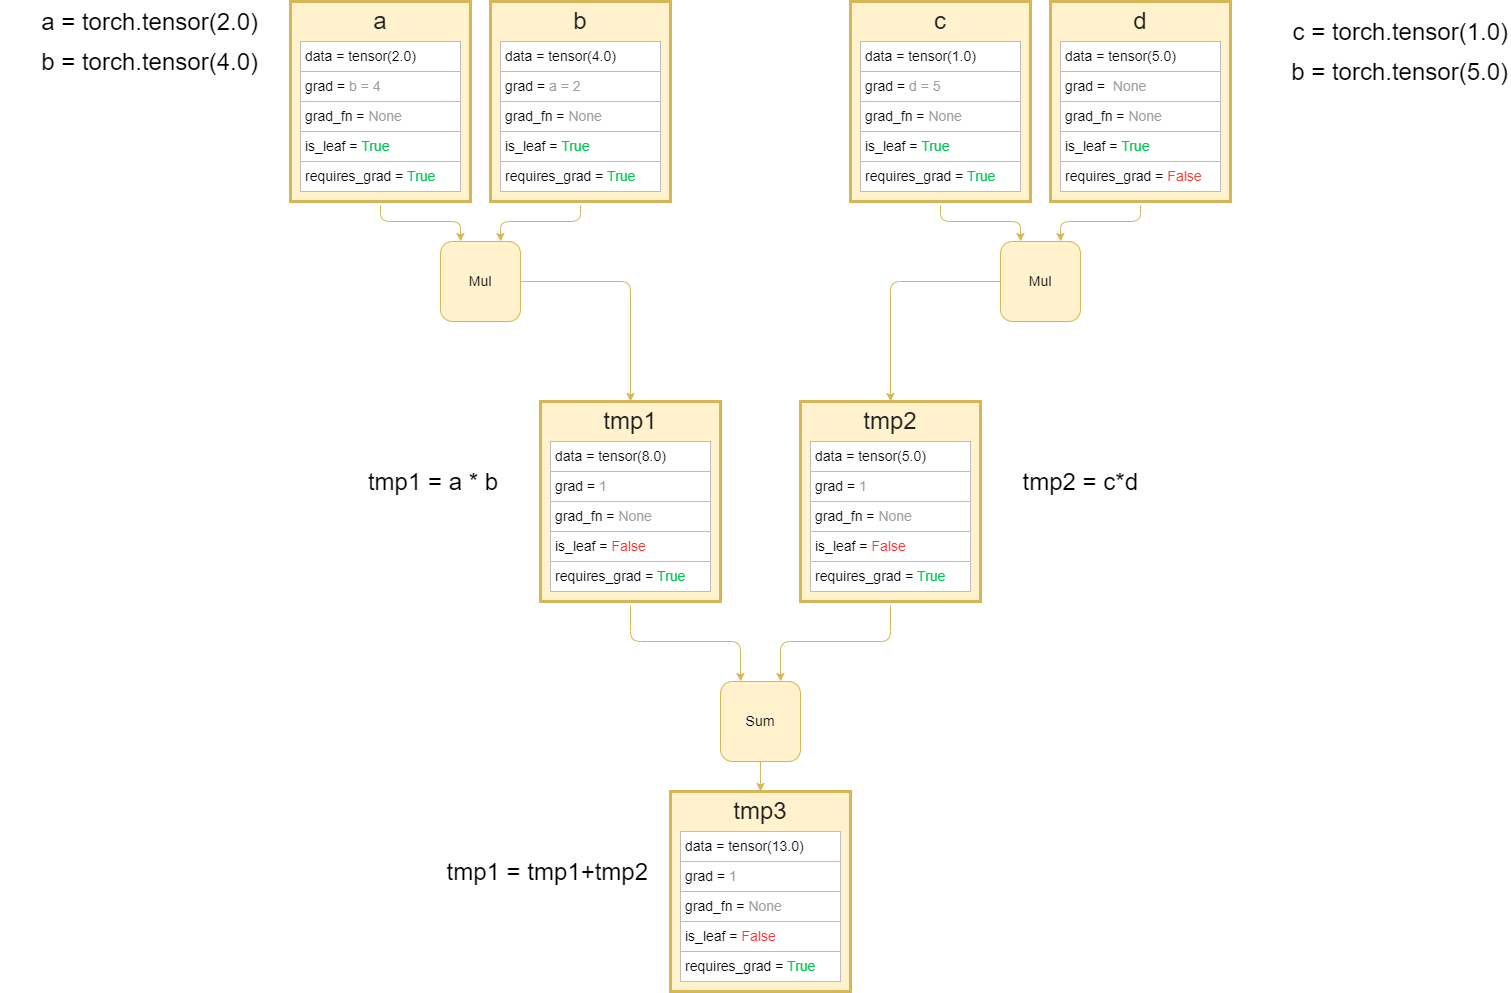

**Домашнее задание 3:** Поэксперементируйте с размером тензоров, которые влезут на видеоркарту в Colab. Найдите максимальный размер тензора для типа данных float32, float64, float16, int32, int64. На сколько они отличаются.

In [74]:
x = torch.zeros([2**32], dtype=torch.float32, device='cuda')

RuntimeError: ignored

In [80]:
torch.cuda.empty_cache()

In [81]:
x = torch.zeros([2**33], dtype=torch.float16, device='cuda')

RuntimeError: ignored

In [60]:
torch.cuda.empty_cache()

In [84]:
x = torch.zeros([2**32], dtype=torch.int32, device='cuda')

RuntimeError: ignored

In [85]:
x = torch.zeros([2**31], dtype=torch.int64, device='cuda')

RuntimeError: ignored

In [51]:
torch.cuda.empty_cache()

**Домашнее задание 4:** Напишите хороший пример неэффективного кода для занятия памяти видеокарты, который вызовет ошибку out of memory

In [3]:
def allocate_empty_tensor(dim_size):
  a=torch.zeros(2**10, dim_size, dtype=torch.float32, device='cuda')


for i in range(22):
  allocate_empty_tensor(2**i)

**Домашнее задание 5:** Используя один линейный слой `nn.Linear` и один входной тензор `x` подберите подберите размерности так, чтобы занимать всю видеопамять.
Попробуйте применить линейный слой к тензору `x`. Что произойдет? Кратко опишите ваши эксперименты. Что вы поняли?

$2^{32}$ аллоцировать не можем => попробуем размерности
$H*W + T*H + T*W = 2^{32}$, т.е сумма размерности матрицы весов, X и выходов соответственно

Привяжем все переменные к виду $2^k$. Возьмём $H = 2^{15}$, $W = 2^{16}$, $T = 2^{15}$

In [32]:
H = 2**15
W = 2**16
T = 2**15

layer = torch.nn.Linear(H, W, device='cuda')
x = torch.zeros([T, H], device='cuda')
layer(x)

RuntimeError: ignored

# Рекомендуемые ссылки

- [Нейронные сети и компьютерное зрение, Samsung AI Center, часть 1](https://stepik.org/course/50352/syllabus)
- [Cимулятор](https://playground.tensorflow.org/) нейронов и нейронных сетей